In [2]:
import pandas as pd
from sqlalchemy import create_engine


db_type = 'mysql+pymysql'  
username = 'root'
password = '****'
host = 'localhost'
port = '3306'  
database = '****'


connection_string = f"{db_type}://{username}:{password}@{host}:{port}/{database}"


engine = create_engine(connection_string)


query = """
SELECT 
  CASE 
    WHEN MONTH(date) IN (9, 10, 11) THEN 1 
    WHEN MONTH(date) IN (12, 1, 2) THEN 2   
    WHEN MONTH(date) IN (3, 4, 5) THEN 3    
    ELSE 4                                  
  END AS fiscal_quarter,
  SUM(sold_quantity) AS total_quantity
FROM fact_sales_monthly
WHERE fiscal_year = 2020
GROUP BY fiscal_quarter;
"""


df = pd.read_sql(query, engine)

df['total_quantity'] = df['total_quantity'].astype(int)

print(df.to_string(index=False))


 fiscal_quarter  total_quantity
              1         7005619
              2         6649642
              3         2075087
              4         5042541


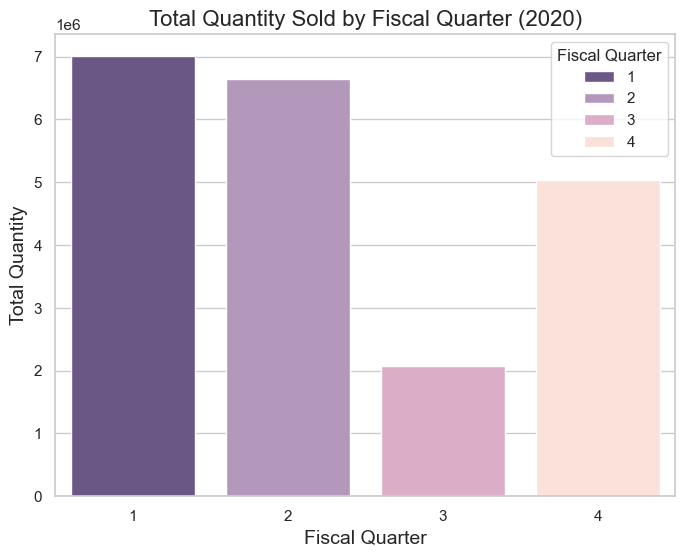

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))


custom_palette = ['#694F8E', '#B692C2', '#E3A5C7', '#FFDFD6']  


sns.barplot(x='fiscal_quarter', y='total_quantity', data=df, hue='fiscal_quarter', dodge=False, palette=custom_palette)

# Set title and labels
plt.title('Total Quantity Sold by Fiscal Quarter (2020)', fontsize=16)
plt.xlabel('Fiscal Quarter', fontsize=14)
plt.ylabel('Total Quantity', fontsize=14)


plt.legend(title='Fiscal Quarter')


plt.show()
